<a href="https://colab.research.google.com/github/hector6921/langchain-learning/blob/main/conditional-edges-multiple-routers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install langgraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 19.8 MB/s eta 0:00:00


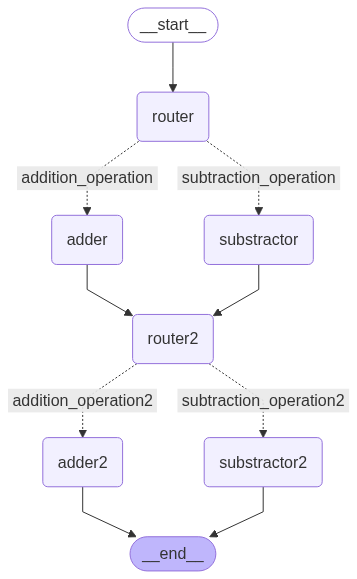

{'number1': 10, 'operation': '-', 'number2': 5, 'number3': 10, 'operation2': '+', 'number4': 10, 'finalNumber': 5, 'finalNumber2': 20}


In [10]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

class AgentState(TypedDict):
  number1: int
  operation: str
  number2: int
  number3: int
  operation2: str
  number4: int
  finalNumber: int
  finalNumber2: int
def adder(state: AgentState) -> AgentState:
  """this node adds the two numbers"""
  state["finalNumber"] = state["number1"] + state["number2"]
  return state
def substractor(state: AgentState) -> AgentState:
  """this node subtracts the two numbers"""
  state["finalNumber"] = state["number1"] - state["number2"]
  return state
def decide_next_node(state: AgentState) -> AgentState:
  """this node will select the next node of the graph"""
  if state["operation"] == "+":
    return "addition_operation"
  elif state["operation"] == "-":
    return "subtraction_operation"

def adder2(state: AgentState) -> AgentState:
  """this node adds the two numbers"""
  state["finalNumber2"] = state["number3"] + state["number4"]
  return state
def substractor2(state: AgentState) -> AgentState:
  """this node subtracts the two numbers"""
  state["finalNumber2"] = state["number3"] - state["number4"]
  return state
def decide_next_node2(state: AgentState) -> AgentState:
  """this node will select the next node of the graph"""
  if state["operation2"] == "+":
    return "addition_operation2"
  elif state["operation2"] == "-":
    return "subtraction_operation2"

graph = StateGraph(AgentState)
graph.add_node("adder", adder)
graph.add_node("substractor", substractor)
graph.add_node("router", lambda state: state)
graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #Edge: node
        "addition_operation": "adder",
        "subtraction_operation": "substractor",
    }
)


graph.add_edge("adder", "router2")
graph.add_edge("substractor", "router2")

#router 2
graph.add_node("adder2", adder2)
graph.add_node("substractor2", substractor2)
graph.add_node("router2", lambda state: state)

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        #Edge: node
        "addition_operation2": "adder2",
        "subtraction_operation2": "substractor2",
    }
)
graph.add_edge("adder2", END)
graph.add_edge("substractor2", END)
app = graph.compile()

display(Image(app.get_graph().draw_mermaid_png()))
result = app.invoke({"number1": 10, "number2": 5, "operation": "-", "number3": 10, "number4": 10, "operation2": "+"})
print(result)